<a href="https://colab.research.google.com/github/Czedros/CSE352-Machine-Learning-Assignments/blob/main/ComplexSearch/tsp2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Two Traveling Salespeople

Name: Kay Zhang

I understand that my submission needs to be my own work: yes

Points: 10

## Two-person Version of the [Traveling Salesman Problem](https://en.wikipedia.org/wiki/Travelling_salesman_problem)

* __Goal:__ Find the two tours which collectively visit each of $n$ cities exactly once and return back to the same starting city. Given are pairwise distances between cities, where $d_{i,j}$ is the distance from city $i$ to city $j$.

* __State space:__ Each state represents a pair of tours, where the first element of the pair are the cities to visit for the first person and the second element are the cities to visit for the second person. The cities are numbered and the tours can be expressed a pair of vectors $(\pi_1, \pi_2)$ with the order in which the cities are visited. That is, $\pi_i(1)$ is the index of the first city to visit by the $i$th person ($i$ either is 1 or 2), $\pi_i(2)$ the index of the second city to visit by the $i$th person, and so on.

* __Objective function:__ Minimize the maximum tour length for both people. Informally, the cities should be divided up roughly evenly between the two people so that neither one has a tour that is too long.

The optimization problem is to find the optimal pair of tours $\pi_1^*$ and $\pi_2^*$ through the $n$ cities and which return to the start cities of each tour:

  > minimize: $\max(\mathrm{tourlength}(\pi_1), \mathrm{tourlength}(\pi_2))$
  where $\mathrm{tourlength}(\pi_i) = d_{\pi_i(n),\pi_i(1)} + \sum_{j = 1}^{n-1} d_{\pi_i(j),\pi_i(j+1)}$
  >
  > subject to: every city must be visited exactly once


## Helper functions

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

np.set_printoptions(precision=2)

np.random.seed(0) # make the results repeatable

In [17]:
def random_tour_pair(n):
    """Create two random tours with n cities"""

    tour = list(range(n))
    np.random.shuffle(tour)

    split_index = np.random.randint(0, n-1)
    tour1 = tour[:split_index]
    tour2 = tour[split_index:]

    return tour1, tour2

random_tour_pair(10)

([2, 8, 4, 9], [1, 6, 7, 3, 0, 5])

In [18]:
from scipy.spatial.distance import pdist
from scipy.spatial.distance import squareform

def random_tsp(n):
    """
    Create a random (Euclidean) traveling salesman problem. Choose n points randomly in a 1 x 1 unit square and calulates a
    pairwise Euclidean distance matrix.
    """

    pos = pd.DataFrame({
        "x" : np.random.uniform(size = n),
        "y" : np.random.uniform(size = n)
    })

    dist = squareform(pdist(pos))

    return({"pos": pos, "dist": dist})

tsp = random_tsp(10)

print(f"Positions:\n{tsp['pos']}")
print(f"Distance matrix:\n{pd.DataFrame(tsp['dist'])})")

Positions:
          x         y
0  0.297535  0.368242
1  0.056713  0.957155
2  0.272656  0.140351
3  0.477665  0.870087
4  0.812169  0.473608
5  0.479977  0.800911
6  0.392785  0.520477
7  0.836079  0.678880
8  0.337396  0.720633
9  0.648172  0.582020
Distance matrix:
          0         1         2         3         4         5         6  \
0  0.000000  0.636250  0.229245  0.533194  0.525310  0.469561  0.179578   
1  0.636250  0.000000  0.844867  0.429862  0.896957  0.451182  0.551028   
2  0.229245  0.844867  0.000000  0.757987  0.634140  0.692330  0.398657   
3  0.533194  0.429862  0.757987  0.000000  0.518737  0.069215  0.359766   
4  0.525310  0.896957  0.634140  0.518737  0.000000  0.466346  0.421995   
5  0.469561  0.451182  0.692330  0.069215  0.466346  0.000000  0.293676   
6  0.179578  0.551028  0.398657  0.359766  0.421995  0.293676  0.000000   
7  0.621712  0.827556  0.779396  0.406227  0.206659  0.376431  0.470745   
8  0.354638  0.367050  0.583882  0.204968  0.535192  0.

In [19]:
def tour_pair_max_length(tsp, tour_pair):
   """Calculate the maximum length of a pair of tours, i.e., the objective function."""

   tour0_len = tour_length(tsp, tour_pair[0])
   tour1_len = tour_length(tsp, tour_pair[1])

   return max(tour0_len, tour1_len)

def tour_length(tsp, tour):
    """Caclulate the length of a single tour"""

    # make sure tour is a Python list (not an array or a numpy.array)
    if not isinstance(tour, list): tour = tour.tolist()

    tl = 0
    dist = tsp["dist"]

    for i in range(len(tour)-1):
        tl += dist[tour[i], tour[i+1]]

    tl += dist[tour[-1], tour[0]]

    return(tl)

np.random.seed(0) # make the results repeatable
tour_pair = random_tour_pair(10)
print(f"objective value: {tour_pair_max_length(tsp, tour_pair)}")

objective value: 2.881937519770044


Tour length (red): 1.9
Tour length (blue): 2.88


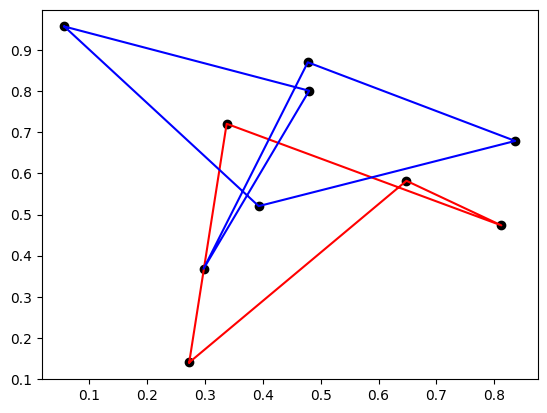

In [20]:
def show_2tsp(tsp, tour_pair = None):
    """display the twoperson traveling salesman problem and a tour pair."""

    pos = tsp["pos"]

    plt.scatter(pos["x"], pos["y"], color='black')

    if tour_pair is not None:
      colors = ['red', 'blue']

      for tour, color in zip(tour_pair, colors):
        # make sure tour is a Python list (not an array or a numpy.array)
        if not isinstance(tour, list): tour = tour.tolist()

        print(f"Tour length ({color}): {round(tour_length(tsp, tour), 2)}")
        tour_x_list = [pos.loc[i, 'x'] for i in tour]
        tour_y_list = [pos.loc[i, 'y'] for i in tour]

        # wrap back to start
        tour_x_list.append(tour_x_list[0])
        tour_y_list.append(tour_y_list[0])

        plt.plot(tour_x_list, tour_y_list, color)

    plt.show()

show_2tsp(tsp, tour_pair)

## Steepest-ascent Hill Climbing Search [2 Points]

Come up with reasonable definition for local moves and explain it in text. Implement a steepest-ascent hill climbing strategy. Measure and report the performance of this on 50 random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.spatial.distance import pdist, squareform


def generate_neighbors(tsp, tour_pair):
    neighbors = []
    tour1, tour2 = tour_pair
    tour1 = list(tour1)
    tour2 = list(tour2)

    # Move one city from tour1 -> tour2
    for i in range(len(tour1)):
        city_to_move = tour1[i]
        new_tour1 = tour1[:i] + tour1[i+1:]

        # Skip neighbors that produce an empty tour1 (if you require at least 1 city in each tour).
        # If you allow an empty tour to exist conceptually, you'd still need a safe way to handle it
        # or else your tour_length will fail. For now, let's skip:
        if len(new_tour1) == 0:
            # If you *strictly* want to disallow empty tours, keep this check.
            # If empty tours are allowed logically, you'd have to handle them in tour_length.
            continue

        for insert_pos in range(len(tour2) + 1):
            new_tour2 = tour2[:insert_pos] + [city_to_move] + tour2[insert_pos:]
            # If you also want to skip empty second tours for the reverse case, you'd do similarly.

            # Now it's safe to evaluate
            obj_value = tour_pair_max_length(tsp, (new_tour1, new_tour2))
            neighbors.append(((new_tour1, new_tour2), obj_value))

    # Move one city from tour2 -> tour1
    for i in range(len(tour2)):
        city_to_move = tour2[i]
        new_tour2 = tour2[:i] + tour2[i+1:]

        if len(new_tour2) == 0:
            continue

        for insert_pos in range(len(tour1) + 1):
            new_tour1 = tour1[:insert_pos] + [city_to_move] + tour1[insert_pos:]
            obj_value = tour_pair_max_length(tsp, (new_tour1, new_tour2))
            neighbors.append(((new_tour1, new_tour2), obj_value))

    return neighbors

def steepest_ascent_hill_climb(tsp, initial_tour_pair, max_iters=1000):
    """
    Perform steepest-ascent hill climbing (for minimization).
    Returns:
      - best_tour_pair found,
      - best objective value,
      - number_of_moves_analyzed (i.e., how many neighbors we evaluated).
    """
    current_tour_pair = (list(initial_tour_pair[0]), list(initial_tour_pair[1]))
    current_obj = tour_pair_max_length(tsp, current_tour_pair)

    moves_analyzed = 0

    for _ in range(max_iters):
        neighbors = generate_neighbors(tsp, current_tour_pair)
        # Evaluate all neighbors and pick the best
        best_neighbor_obj = current_obj
        best_neighbor_pair = current_tour_pair

        for (nbr_tour_pair, nbr_obj) in neighbors:
            moves_analyzed += 1  # We are evaluating a neighbor
            if nbr_obj < best_neighbor_obj:
                best_neighbor_obj = nbr_obj
                best_neighbor_pair = nbr_tour_pair

        # Check if we found an improvement
        if best_neighbor_obj < current_obj:
            current_obj = best_neighbor_obj
            current_tour_pair = best_neighbor_pair
        else:
            # No improvement found; we are done
            break

    return current_tour_pair, current_obj, moves_analyzed



def run_experiment(num_instances=50, n=10):
    sum_objective = 0.0
    sum_moves_analyzed = 0

    for _ in range(num_instances):
        # 1) Generate random TSP
        tsp = random_tsp(n)

        # 2) Generate a random initial solution
        tour1, tour2 = random_tour_pair(n)

        # Keep redrawing until both tours are non-empty
        while len(tour1) == 0 or len(tour2) == 0:
            tour1, tour2 = random_tour_pair(n)

        initial_pair = (tour1, tour2)

        # 3) Run steepest-ascent hill climbing
        final_pair, final_obj, moves_analyzed = steepest_ascent_hill_climb(tsp, initial_pair)

        # Accumulate statistics
        sum_objective += final_obj
        sum_moves_analyzed += moves_analyzed

    avg_objective = sum_objective / num_instances
    avg_moves_analyzed = sum_moves_analyzed / num_instances

    print(f"Number of cities: {n}")
    print(f"Number of TSP instances: {num_instances}")
    print(f"Average final objective: {round(avg_objective, 2)}")
    print(f"Average moves analyzed: {round(avg_moves_analyzed, 2)}")


# =======================
# Run the Experiment
# =======================

run_experiment(num_instances=50, n=10)

Number of cities: 10
Number of TSP instances: 50
Average final objective: 1.96
Average moves analyzed: 264.44


## Steepest-ascent Hill Climbing Search with Random Restarts [1 Point]

Modify the code to include random restarts once improvement is no longer possible. For a fixed problem instance, analyze the improvement in the objective function as more restarts are done. Plot the number of restarts on the x axis and the objective function on the y axis.

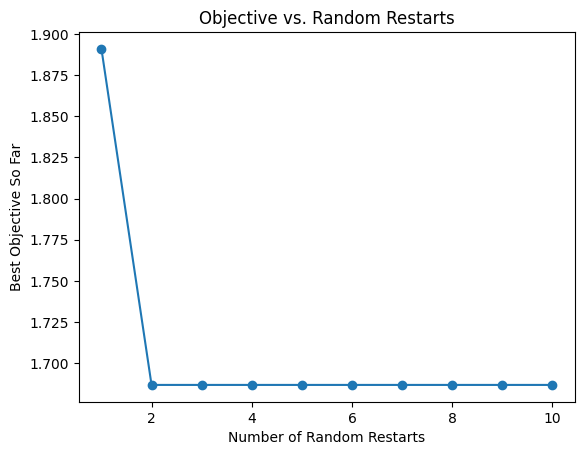

Final best objective after all restarts: 1.686789931360785


In [57]:
def random_restart_hill_climb(tsp, num_restarts=10, max_iters=1000):
    """
    Apply steepest-ascent hill climbing with random restarts.
    For each restart:
      1) generate a random initial solution
      2) run steepest-ascent hill climbing
      3) keep track of the best objective found so far
    Return a list (or array) of the best objective after each restart.
    """

    # We'll store the best objective found so far after each restart
    best_objectives = []

    # Initialize global best to something large
    global_best_obj = float("inf")
    global_best_pair = None

    for r in range(num_restarts):
        # 1) Generate a random solution
        # Ensure we don't get an empty tour
        while True:
            candidate_tour1, candidate_tour2 = random_tour_pair(len(tsp["dist"]))
            if len(candidate_tour1) > 0 and len(candidate_tour2) > 0:
                break
        initial_pair = (candidate_tour1, candidate_tour2)

        # 2) Perform steepest ascent
        final_pair, final_obj, _ = steepest_ascent_hill_climb(tsp, initial_pair, max_iters=max_iters)

        # 3) Check if this is better than the best we have so far
        if final_obj < global_best_obj:
            global_best_obj = final_obj
            global_best_pair = final_pair

        # Record the best objective found so far (after r restarts)
        best_objectives.append(global_best_obj)

    return best_objectives, global_best_pair

n_cities = 10
tsp_instance = random_tsp(n_cities)

# How many random restarts to do
max_restarts = 10

# Run the random-restart hill climb
best_obj_list, best_pair = random_restart_hill_climb(tsp_instance, num_restarts=max_restarts, max_iters=1000)

# Plot the improvement in the objective as restarts increase
plt.figure()
plt.plot(range(1, max_restarts + 1), best_obj_list, marker='o')
plt.xlabel('Number of Random Restarts')
plt.ylabel('Best Objective So Far')
plt.title('Objective vs. Random Restarts')
plt.show()

print("Final best objective after all restarts:", best_obj_list[-1])

## Stochastic Hill Climbing [1 Point]

Implement an approach that chooses randomly from among all uphill moves. Measure and report the performance of this on the same 50 random problem instances as was done earlier. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [39]:
def stochastic_hill_climb(tsp, initial_tour_pair, max_iters=1000):
    """
    Perform stochastic hill climbing (for minimization):
      - Among all neighbors strictly better than the current solution,
        pick one *at random*.
      - If no neighbor is better, stop.

    Returns:
      - best_tour_pair found,
      - best objective value,
      - number_of_moves_analyzed (i.e., how many neighbors we evaluated).
    """
    current_tour_pair = (list(initial_tour_pair[0]), list(initial_tour_pair[1]))
    current_obj = tour_pair_max_length(tsp, current_tour_pair)

    moves_analyzed = 0

    for _ in range(max_iters):
        neighbors = generate_neighbors(tsp, current_tour_pair)

        # Collect all improving neighbors
        improving_neighbors = []
        for (nbr_tour_pair, nbr_obj) in neighbors:
            moves_analyzed += 1  # We are evaluating a neighbor
            if nbr_obj < current_obj:
                improving_neighbors.append((nbr_tour_pair, nbr_obj))

        if len(improving_neighbors) == 0:
            # No neighbor is better -> stop
            break
        else:
            # Choose one of the better neighbors at random
            chosen_neighbor, chosen_obj = improving_neighbors[np.random.randint(len(improving_neighbors))]
            current_tour_pair = chosen_neighbor
            current_obj = chosen_obj

    return current_tour_pair, current_obj, moves_analyzed


def run_experiment_stochastic(num_instances=50, n=10):
    """
    For each of num_instances random TSP of size n:
      1) Generate a random TSP
      2) Generate a random initial tour pair
      3) Run the ST. hill climbing
    Print:
      - Average final objective
      - Average local moves analyzed
    """
    sum_objective = 0.0
    sum_moves_analyzed = 0

    for _ in range(num_instances):
        # 1) Generate random TSP
        tsp = random_tsp(n)

        # 2) Generate random initial solution
        # ensure non-empty tours
        while True:
            tour1, tour2 = random_tour_pair(n)
            if len(tour1) > 0 and len(tour2) > 0:
                break
        initial_pair = (tour1, tour2)

        # 3) Run stochastic hill climbing
        final_pair, final_obj, moves_analyzed = stochastic_hill_climb(tsp, initial_pair)

        sum_objective += final_obj
        sum_moves_analyzed += moves_analyzed

    avg_objective = sum_objective / num_instances
    avg_moves_analyzed = sum_moves_analyzed / num_instances

    print(f"Stochastic Hill Climbing on {num_instances} TSP Instances of size {n}")
    print(f"Average Final Objective: {round(avg_objective, 2)}")
    print(f"Average Moves Analyzed: {round(avg_moves_analyzed, 2)}")

run_experiment_stochastic(num_instances=50, n=10)

Stochastic Hill Climbing on 50 TSP Instances of size 10
Average Final Objective: 2.14
Average Moves Analyzed: 496.08


## First-choice Hill Climbing [1 Point]

First-choice hill climbing is a type of stochastic hill climbing that generates one random local neighbor at a time and accept it if it has a better objective function value than the current state. Implement this and report the performance of on 50 the same random problem instances. Report the average objective function reached over all problem instances, as well as the average number of local moves analyzed.

In [45]:
def first_choice_hill_climb(tsp, initial_tour_pair, max_iters=1000):
    """
    First-choice hill climbing (for minimization):
      - Randomly permute all neighbors
      - Generate neighbors one by one in random order
      - As soon as we find an improving neighbor, move to it and stop checking the rest
      - If no neighbor is better, stop
    Returns:
      - final tour pair
      - final objective value
      - number_of_moves_analyzed
    """
    current_tour_pair = (list(initial_tour_pair[0]), list(initial_tour_pair[1]))
    current_obj = tour_pair_max_length(tsp, current_tour_pair)

    moves_analyzed = 0

    for _ in range(max_iters):
        # Generate all neighbors
        neighbors = generate_neighbors(tsp, current_tour_pair)

        # Shuffle neighbors to pick one at random order
        np.random.shuffle(neighbors)

        improved = False

        for (nbr_tour_pair, nbr_obj) in neighbors:
            moves_analyzed += 1  # We have to evaluate this neighbor
            if nbr_obj < current_obj:
                # Found an improvement; move to it immediately
                current_tour_pair = nbr_tour_pair
                current_obj = nbr_obj
                improved = True
                break  # Stop checking neighbors for this iteration

        if not improved:
            # No neighbor was better, so we stop
            break

    return current_tour_pair, current_obj, moves_analyzed

def run_experiment_first_choice(num_instances=50, n=10):
    """
    1) For each of num_instances random TSPs with size n:
       - generate TSP,
       - generate random initial solution,
       - run first-choice hill climbing,
    2) Report average final objective and average moves analyzed.
    """
    sum_objective = 0.0
    sum_moves_analyzed = 0

    for _ in range(num_instances):
        # 1) Generate random TSP
        tsp = random_tsp(n)

        # 2) Generate a random initial solution
        # ensure non-empty tours
        while True:
            tour1, tour2 = random_tour_pair(n)
            if len(tour1) > 0 and len(tour2) > 0:
                break
        initial_pair = (tour1, tour2)

        # 3) Run first-choice hill climbing
        final_pair, final_obj, moves_analyzed = first_choice_hill_climb(tsp, initial_pair)

        sum_objective += final_obj
        sum_moves_analyzed += moves_analyzed

    avg_objective = sum_objective / num_instances
    avg_moves_analyzed = sum_moves_analyzed / num_instances

    print(f"First-Choice Hill Climbing on {num_instances} TSP instances (n={n}):")
    print(f"Average Final Objective: {round(avg_objective, 2)}")
    print(f"Average Moves Analyzed: {round(avg_moves_analyzed, 2)}")
run_experiment_first_choice(num_instances=50, n=10)

First-Choice Hill Climbing on 50 TSP instances (n=10):
Average Final Objective: 2.04
Average Moves Analyzed: 118.74


## Simulated Annealing [1 Point]

Implement an algorithm that uses simulated annealing to solve the problem, as described in the lectures and book (Section 4.1.2). Experiment with hyperparameters like the temperature schedule and thresholds until you find values that work well.

In [56]:
def get_random_neighbor(tsp, tour_pair, max_attempts=100):
    """
    Return a single random neighbor of `tour_pair` that does NOT produce an empty tour.
    If we cannot find any (very rare), we just return the original tour_pair itself.
    """
    tour1, tour2 = tour_pair
    n1, n2 = len(tour1), len(tour2)

    # If both tours are completely empty (edge case), just return
    if n1 == 0 and n2 == 0:
        return tour_pair, tour_pair_max_length(tsp, tour_pair)

    attempt = 0
    while attempt < max_attempts:
        attempt += 1

        # Decide which tour to pick from (only pick from it if it's not empty).
        # If both are non-empty, choose randomly. If one is empty, pick from the other.
        if n1 > 0 and n2 > 0:
            pick_from_tour1 = (np.random.rand() < 0.5)
        elif n1 == 0:
            pick_from_tour1 = False
        else:  # n2 == 0
            pick_from_tour1 = True

        if pick_from_tour1:
            # If tour1 has only 1 city, removing it yields an empty new_tour1
            if n1 == 1:
                continue  # skip; try again
            # Otherwise pick a random city from tour1
            i = np.random.randint(n1)
            city = tour1[i]
            new_tour1 = tour1[:i] + tour1[i+1:]
            # Insert it in random position in tour2
            insert_pos = np.random.randint(n2 + 1)
            new_tour2 = tour2[:insert_pos] + [city] + tour2[insert_pos:]
        else:
            # pick from tour2
            if n2 == 1:
                continue  # skip; removing the only city leads to empty new_tour2
            i = np.random.randint(n2)
            city = tour2[i]
            new_tour2 = tour2[:i] + tour2[i+1:]
            insert_pos = np.random.randint(n1 + 1)
            new_tour1 = tour1[:insert_pos] + [city] + tour1[insert_pos:]

        # Now we have new_tour1 and new_tour2, but we must ensure neither is empty.
        # If we truly want to forbid *any* empty tours, check:
        if len(new_tour1) == 0 or len(new_tour2) == 0:
            continue  # skip
        # Otherwise accept
        neighbor_pair = (new_tour1, new_tour2)
        neighbor_obj = tour_pair_max_length(tsp, neighbor_pair)
        return neighbor_pair, neighbor_obj

    # If we failed to find any valid neighbor after max_attempts, just return the original
    # (This is extremely unlikely unless n=1 or something corner-case.)
    return tour_pair, tour_pair_max_length(tsp, tour_pair)



def simulated_annealing(
    tsp,
    initial_tour_pair,
    T0=1.0,        # initial temperature
    alpha=0.99,    # cooling rate
    max_iters=10000,
    min_temp=1e-4
):
    """
    Perform Simulated Annealing to minimize tour_pair_max_length(tsp, tour_pair).
    - Each iteration, we pick a random neighbor (get_random_neighbor).
    - Let delta = neighbor_obj - current_obj.
      - If delta < 0 (neighbor is better), accept it.
      - Otherwise accept with probability exp(-delta / T).
    - Then we cool T by alpha*T.
    - We keep track of the best solution found so far.
    Returns:
      - best_tour_pair overall
      - best_objective found
      - moves_analyzed (# of neighbors evaluated, basically = # of iterations we actually run)
    """
    # Start with the initial solution
    current_tour_pair = (list(initial_tour_pair[0]), list(initial_tour_pair[1]))
    current_obj = tour_pair_max_length(tsp, current_tour_pair)
    best_tour_pair = current_tour_pair
    best_obj = current_obj

    T = T0
    moves_analyzed = 0

    for _ in range(max_iters):
        # If temperature is too small, we stop
        if T < min_temp:
            break

        moves_analyzed += 1  # We are about to evaluate 1 neighbor
        neighbor_pair, neighbor_obj = get_random_neighbor(tsp, current_tour_pair)

        delta = neighbor_obj - current_obj

        if delta < 0:
            # neighbor is strictly better, accept
            current_tour_pair = neighbor_pair
            current_obj = neighbor_obj
        else:
            # accept with probability e^(-delta / T)
            accept_prob = np.exp(-delta / T)
            if np.random.rand() < accept_prob:
                current_tour_pair = neighbor_pair
                current_obj = neighbor_obj

        # Keep track of global best
        if current_obj < best_obj:
            best_obj = current_obj
            best_tour_pair = current_tour_pair

        # Cool temperature
        T = alpha * T

    return best_tour_pair, best_obj, moves_analyzed


# ================================================
# 3) Running SA on 50 Random TSP Instances
# ================================================
def run_experiment_sa(
    num_instances=50,
    n=10,
    T0=1.0,
    alpha=0.99,
    max_iters=10000,
    min_temp=1e-4
):
    """
    For each of num_instances random TSPs (size n):
      1) Create TSP,
      2) Create random initial solution (with non-empty tours),
      3) Run SA with chosen hyperparameters.
    Print the average final objective and average moves analyzed.
    """
    sum_objective = 0.0
    sum_moves_analyzed = 0.0

    for _ in range(num_instances):
        # 1) Generate random TSP
        tsp = random_tsp(n)

        # 2) Generate random initial solution (ensure non-empty tours)
        while True:
            t1, t2 = random_tour_pair(n)
            if len(t1) > 0 and len(t2) > 0:
                break
        init_pair = (t1, t2)

        # 3) Run Simulated Annealing
        best_pair, best_obj, moves_analyzed = simulated_annealing(
            tsp, init_pair,
            T0=T0, alpha=alpha,
            max_iters=max_iters,
            min_temp=min_temp
        )

        sum_objective += best_obj
        sum_moves_analyzed += moves_analyzed

    avg_objective = sum_objective / num_instances
    avg_moves_analyzed = sum_moves_analyzed / num_instances
    print(f"Simulated Annealing on {num_instances} TSP instances (n={n}):")
    print(f"  T0={T0}, alpha={alpha}, max_iters={max_iters}, min_temp={min_temp}")
    print(f"Average Final Objective: {round(avg_objective, 2)}")
    print(f"Average Moves Analyzed: {round(avg_moves_analyzed, 2)}")


# =======================
# Run the Experiment
# =======================
run_experiment_sa(
    num_instances=50,
    n=10,
    T0=1.0,       # Try adjusting these hyperparameters
    alpha=0.99,
    max_iters=5000,
    min_temp=1e-4
)

Simulated Annealing on 50 TSP instances (n=10):
  T0=1.0, alpha=0.99, max_iters=5000, min_temp=0.0001
Average Final Objective: 1.75
Average Moves Analyzed: 917.0


## Compare Performance [1 Point]

Compare simulated annealing with random restarts and stochastic hill climbing. Analyze which algorithm is better for 10 cities, 20 cities, and 50 cities. To make the comparison fair, try to ensure the time taken for each approach is roughly the same.

For timing you can use the `time` package.

In [58]:
import time

t0 = time.time()
print("Do something")
t1 = time.time()

print(f"This took: {(t1-t0) * 1e3} milliseconds")

Do something
This took: 1.6264915466308594 milliseconds


In [60]:
def run_algorithm(algorithm, tsp, n_runs=1, **algo_params):
    """
    Utility: runs the specified algorithm (by name) n_runs times
    on the same TSP. Measures average objective & average runtime.
    """
    def create_initial_solution():
        while True:
            t1, t2 = random_tour_pair(len(tsp["dist"]))
            if len(t1) > 0 and len(t2) > 0:
                return (t1, t2)

    objs = []
    times_list = []

    for _ in range(n_runs):
        # random initial pair if needed
        init_pair = create_initial_solution()

        start = time.time()
        if algorithm == "RRHC":
            # using original random-restart function
            best_objs, best_pair = random_restart_hill_climb(
                tsp,
                num_restarts=algo_params.get('num_restarts', 5),
                max_iters=algo_params.get('max_iters', 1000)
            )
            # final best objective is last in best_objs
            final_obj = best_objs[-1]
        elif algorithm == "SA":
            _, final_obj, _ = simulated_annealing(
                tsp, init_pair,
                T0=algo_params.get('T0', 1.0),
                alpha=algo_params.get('alpha', 0.99),
                max_iters=algo_params.get('max_iters', 5000),
                min_temp=algo_params.get('min_temp', 1e-4)
            )
        elif algorithm == "SHC":
            _, final_obj, _ = stochastic_hill_climb(
                tsp, init_pair,
                max_iters=algo_params.get('max_iters', 1000)
            )
        else:
            raise ValueError("Unknown algorithm: " + algorithm)

        elapsed = time.time() - start

        objs.append(final_obj)
        times_list.append(elapsed)

    return np.mean(objs), np.mean(times_list)

def compare_algos_on_sizes(city_sizes=[10,20,50], n_instances=3, n_runs=1):
    """
    Compare (random-restart HC vs. Stochastic HC vs. Simulated Annealing)
    for each city size, building 'n_instances' random TSPs.
    We'll just measure time and final objective.
    """
    results = []

    # Let's fix some hyperparams for demonstration
    rrhc_params = dict(num_restarts=5, max_iters=2000)
    shc_params  = dict(max_iters=2000)
    sa_params   = dict(T0=1.0, alpha=0.99, max_iters=5000, min_temp=1e-4)

    for n in city_sizes:
        for inst_id in range(n_instances):
            tsp = random_tsp(n)

            # 1) Random Restarts Hill Climb
            rrhc_obj, rrhc_time = run_algorithm("RRHC", tsp, n_runs, **rrhc_params)

            # 2) Stochastic Hill Climbing
            shc_obj, shc_time = run_algorithm("SHC", tsp, n_runs, **shc_params)

            # 3) Simulated Annealing
            sa_obj, sa_time = run_algorithm("SA", tsp, n_runs, **sa_params)

            results.append({
                "n": n,
                "inst_id": inst_id,
                "RRHC_obj": rrhc_obj, "RRHC_time": rrhc_time,
                "SHC_obj": shc_obj,   "SHC_time": shc_time,
                "SA_obj": sa_obj,     "SA_time": sa_time
            })

    return pd.DataFrame(results)

########################
# Actually RUN comparison
########################
df_comp = compare_algos_on_sizes(city_sizes=[10, 20,50], n_instances=3, n_runs=1)
print(df_comp)

summary = df_comp.groupby("n").agg({
    "RRHC_obj": "mean", "RRHC_time": "mean",
    "SHC_obj":  "mean", "SHC_time":  "mean",
    "SA_obj":   "mean", "SA_time":   "mean"
}).reset_index()
print("\n--- Summary ---")
print(summary)

    n  inst_id  RRHC_obj  RRHC_time   SHC_obj  SHC_time    SA_obj   SA_time
0  10        0  1.605553   0.005353  1.624352  0.001521  1.852114  0.013284
1  10        1  1.657621   0.004228  2.132788  0.004382  1.783670  0.013912
2  10        2  1.747785   0.005868  2.046552  0.001999  1.504612  0.017060
3  20        0  2.407174   0.091772  3.709630  0.032093  2.461698  0.017162
4  20        1  2.585588   0.071889  3.715672  0.046746  3.864237  0.016578
5  20        2  2.603364   0.093188  3.571296  0.055508  4.208473  0.016625
6  50        0  5.627561   4.616852  5.363293  3.507834  7.805520  0.021995
7  50        1  4.723039   4.014850  6.538903  2.976712  8.174683  0.039265
8  50        2  6.623788   3.450665  6.117200  2.878181  8.324612  0.022078

--- Summary ---
    n  RRHC_obj  RRHC_time   SHC_obj  SHC_time    SA_obj   SA_time
0  10  1.670320   0.005150  1.934564  0.002634  1.713465  0.014752
1  20  2.532042   0.085616  3.665533  0.044783  3.511469  0.016788
2  50  5.658129   4.02

## Tour US States [3 points]

Take your best performing approach for 50 cities and try to find the minimum objective value for a modified version of the two salesman problem going around the 48 lower US states. The modification is that both tours must start and end in New York. New York is the only state shared between the two tours.

Each state is considered visited if you can get to its centroid and it is assumed straight line distances between centroids based on GPS coordinates is the way we want to measure distances.

Plot the minimum objective value 2-tsp tours that you find in red and blue, like was done before for the randomly generated points. Print the length of the best tours, as well as the list of indices corresponding to states (Louisiana=0, Maryland=1, ... , see code below).

Loaded from states.pkl
[('Louisiana', 773189.1979394469, -1515002.377525561), ('Maryland', 1979094.0929296287, -383219.5841403244), ('Wisconsin', 789405.1598855292, 7178.093118233844), ('Florida', 1716480.2191801812, -1645210.600897309), ('Georgia', 1548181.6569137496, -1221152.92728593), ('Tennessee', 1227400.6102994615, -915322.7518723847), ('Minnesota', 437251.5679414956, 158022.4684412311), ('Iowa', 536318.2702880212, -303823.8620393781), ('Missouri', 657464.3949930624, -708334.2472004973), ('Michigan', 1154374.0876788201, 31062.850406589027), ('Idaho', -1153546.3198592367, 32306.322358552956), ('California', -1708049.274751084, -667730.6252787685), ('Connecticut', 2216157.7595848595, -1386.5813699763721), ('Texas', 66673.11730108206, -1502504.3982431893), ('Virginia', 1848871.780566167, -594407.8114616707), ('New York', 1957067.0071638965, 68085.33717547444), ('Illinois', 917185.1983259161, -491248.59737063444), ('Montana', -727314.0192655406, 271896.712857685), ('Kentucky', 12904

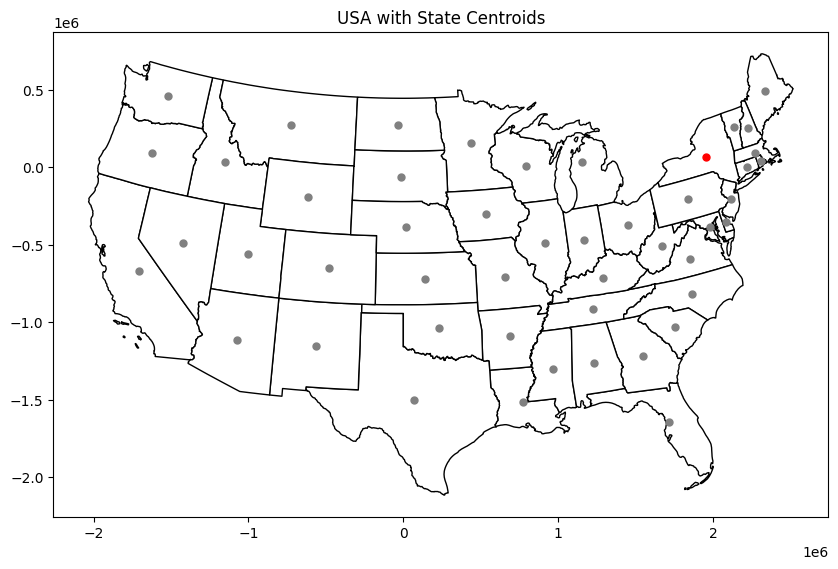

In [63]:
import geopandas as gpd

def get_state_centroids():

    # load pickled data from states.pkl if it exists
    try:
        states = pd.read_pickle('states.pkl')
        print('Loaded from states.pkl')
    except:
        states = gpd.read_file('https://www2.census.gov/geo/tiger/GENZ2021/shp/cb_2021_us_state_20m.zip')

        # pickle (save) the data to states.pkl so we don't need to download in the future
        states.to_pickle('states.pkl')

        print('Downloaded data and saved to states.pkl')

    # Filter out Alaska, Hawaii, and territories
    contiguous_usa = states[~states['STUSPS'].isin(['AK', 'HI', 'PR', 'GU', 'VI', 'MP', 'AS', 'DC'])]

    # Get centroid data
    contiguous_usa = contiguous_usa.to_crs(epsg=2163)
    centroids = contiguous_usa.geometry.centroid
    contiguous_usa['centroid_lon'] = centroids.x
    contiguous_usa['centroid_lat'] = centroids.y

    # Create tuples (state name, x-coordinate, y-coordinate)
    state_tuples = list(zip(contiguous_usa['NAME'], centroids.x, centroids.y))

    return contiguous_usa, state_tuples

def draw_contiguous_usa_map_with_centroids():
    contiguous_usa, state_tuples = get_state_centroids()

    print(state_tuples)
    print(len(state_tuples))

    # Plotting
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    contiguous_usa.plot(ax=ax, color='white', edgecolor='black')

    # Plot centroids
    for statename, x, y in state_tuples:
        color = 'red' if statename == 'New York' else 'grey'
        plt.plot(x, y, marker='o', color=color, markersize=5)

    plt.title("USA with State Centroids")
    plt.show()


draw_contiguous_usa_map_with_centroids()

Loaded from states.pkl
Simulated Annealing: best obj = 24258687.11, in 2378 moves
Time: 0.07s


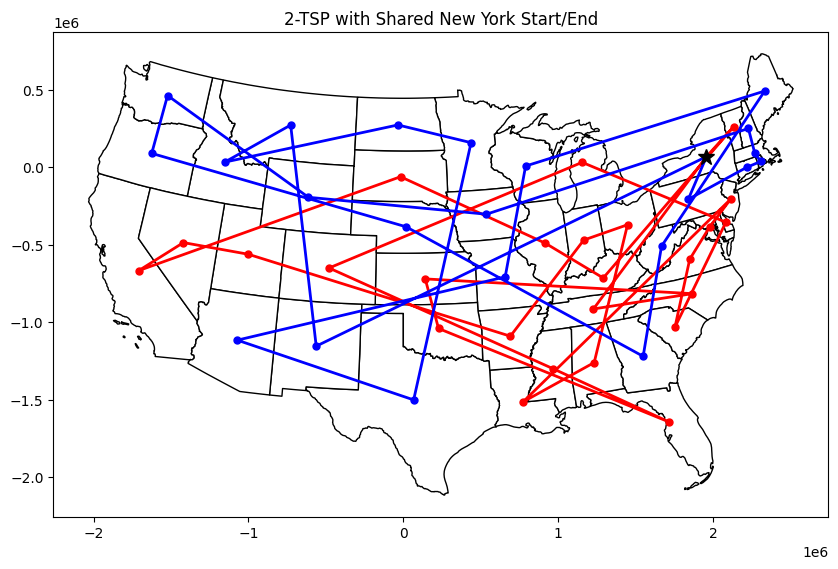

Route1 states: ['Vermont', 'Kentucky', 'Illinois', 'South Dakota', 'California', 'Nevada', 'Utah', 'Arkansas', 'Indiana', 'Ohio', 'Alabama', 'Louisiana', 'New Jersey', 'Maryland', 'Virginia', 'South Carolina', 'Delaware', 'Michigan', 'Colorado', 'Mississippi', 'Florida', 'Oklahoma', 'Kansas', 'North Carolina', 'Tennessee']
Route2 states: ['Pennsylvania', 'Connecticut', 'Rhode Island', 'Massachusetts', 'New Hampshire', 'Iowa', 'Wyoming', 'Washington', 'Oregon', 'Nebraska', 'Georgia', 'West Virginia', 'Maine', 'Wisconsin', 'Missouri', 'Arizona', 'Texas', 'Minnesota', 'North Dakota', 'Idaho', 'Montana', 'New Mexico']


In [65]:
import time
from scipy.spatial.distance import cdist

contiguous_usa, state_tuples = get_state_centroids()

# Each element in state_tuples: (state_name, x, y)
# We'll build:
#   - A distance matrix (48x48)
#   - Find index for "New York"

# Convert to Nx2 array of coordinates
coords = np.array([[x, y] for (_, x, y) in state_tuples])
dist_matrix = cdist(coords, coords, metric="euclidean")

# Find which index is "New York"
ny_index = None
for i, (name, _, _) in enumerate(state_tuples):
    if name == "New York":
        ny_index = i
        break

if ny_index is None:
    raise ValueError("Couldn't find 'New York' in the list of states!")


##########################################
# 2) Define Our 2TSP with Shared New York
##########################################
def two_tsp_obj(distmat, ny_idx, route1, route2):
    """
    Each route is a list of *state indices* (excluding 'ny_idx').
    We measure route length as: NY -> route -> NY,
    and return the max of the two route lengths.
    """

    def route_length(route):
        if len(route) == 0:
            return 0.0  # no travel if you don't leave New York
        length = distmat[ny_idx, route[0]]  # from NY to first
        for i in range(len(route)-1):
            length += distmat[route[i], route[i+1]]
        length += distmat[route[-1], ny_idx]  # from last back to NY
        return length

    return max(route_length(route1), route_length(route2))

def random_partition_47(ny_idx, n=48):
    """Randomly split the 47 non-NY states into route1, route2."""
    all_indices = [i for i in range(n) if i != ny_idx]
    np.random.shuffle(all_indices)
    split_pt = np.random.randint(0, len(all_indices)+1)
    route1 = all_indices[:split_pt]
    route2 = all_indices[split_pt:]
    return route1, route2


##########################################
# 3) Example: Simulated Annealing (SA)
##########################################
def get_random_neighbor_ny(distmat, ny_idx, route1, route2):
    """
    Move exactly one city from route1 -> route2 or vice versa
    (i.e., reassign 1 state). We skip re-ordering within a route
    for simplicity, but you could add that if you like.
    """
    r1 = list(route1)
    r2 = list(route2)

    # pick from whichever is possible
    if len(r1) > 0 and len(r2) > 0:
        pick_from_r1 = (np.random.rand() < 0.5)
    elif len(r1) == 0:
        pick_from_r1 = False
    else:
        pick_from_r1 = True

    if pick_from_r1:
        i = np.random.randint(len(r1))
        city = r1[i]
        new_r1 = r1[:i] + r1[i+1:]
        insert_pos = np.random.randint(len(r2)+1)
        new_r2 = r2[:insert_pos] + [city] + r2[insert_pos:]
    else:
        i = np.random.randint(len(r2))
        city = r2[i]
        new_r2 = r2[:i] + r2[i+1:]
        insert_pos = np.random.randint(len(r1)+1)
        new_r1 = r1[:insert_pos] + [city] + r1[insert_pos:]

    return new_r1, new_r2

def simulated_annealing_2tsp_ny(distmat, ny_idx,
                                T0=1.0, alpha=0.99,
                                max_iters=5000, min_temp=1e-4):
    # start with random partition
    route1, route2 = random_partition_47(ny_idx, distmat.shape[0])
    current_obj = two_tsp_obj(distmat, ny_idx, route1, route2)
    best_obj = current_obj
    best_routes = (route1, route2)

    T = T0
    moves_analyzed = 0

    for _ in range(max_iters):
        if T < min_temp:
            break

        moves_analyzed += 1
        nbr1, nbr2 = get_random_neighbor_ny(distmat, ny_idx, route1, route2)
        nbr_obj = two_tsp_obj(distmat, ny_idx, nbr1, nbr2)

        delta = nbr_obj - current_obj
        if delta < 0:
            # better
            route1, route2 = nbr1, nbr2
            current_obj = nbr_obj
        else:
            # accept with prob e^(-delta / T)
            if np.random.rand() < np.exp(-delta / T):
                route1, route2 = nbr1, nbr2
                current_obj = nbr_obj

        if current_obj < best_obj:
            best_obj = current_obj
            best_routes = (route1[:], route2[:])

        T *= alpha

    return best_routes, best_obj, moves_analyzed


###################################
# 4) Run the Search
###################################
start_time = time.time()

best_routes, best_val, moves = simulated_annealing_2tsp_ny(
    dist_matrix, ny_index,
    T0=1.5, alpha=0.995,
    max_iters=20000, min_temp=1e-5
)

elapsed = time.time() - start_time

print(f"Simulated Annealing: best obj = {round(best_val,2)}, in {moves} moves")
print(f"Time: {round(elapsed,2)}s")


###################################
# 5) Plot the Final Solution
###################################
def plot_2tsp_map(contiguous_usa, state_tuples, ny_idx, route1, route2):
    fig, ax = plt.subplots(1, 1, figsize=(10, 8))
    contiguous_usa.plot(ax=ax, color='white', edgecolor='black')

    # We'll gather (x,y) coords in an array
    coords = np.array([[x, y] for (_, x, y) in state_tuples])

    # Quick helper
    def draw_route(route, color):
        # route is a list of indices, we do (NY) + route + (NY)
        path = [ny_idx] + route + [ny_idx]
        xs = coords[path, 0]
        ys = coords[path, 1]
        ax.plot(xs, ys, color=color, linewidth=2)

    # draw
    draw_route(route1, 'red')
    draw_route(route2, 'blue')

    # Mark states
    # New York in black star for clarity
    ax.plot(coords[ny_idx,0], coords[ny_idx,1], marker='*', markersize=12, color='black')
    for i, (nm, x, y) in enumerate(state_tuples):
        # If it's in route1 or route2 or is NY
        if i == ny_idx:
            continue
        elif i in route1:
            ax.plot(x, y, marker='o', markersize=5, color='red')
        elif i in route2:
            ax.plot(x, y, marker='o', markersize=5, color='blue')
        else:
            ax.plot(x, y, marker='o', markersize=3, color='grey')

    plt.title("2-TSP with Shared New York Start/End")
    plt.show()

plot_2tsp_map(contiguous_usa, state_tuples, ny_index, best_routes[0], best_routes[1])

# Also, print route (in terms of state names)
route1_names = [state_tuples[i][0] for i in best_routes[0]]
route2_names = [state_tuples[i][0] for i in best_routes[1]]
print("Route1 states:", route1_names)
print("Route2 states:", route2_names)



---
Assignment adapted from [Michael Hahsler](https://github.com/mhahsler/CS7320-AI) under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0/deed.en) license.
